- objective function, criterion, cost function, loss function, error function
- critical point, stationary point
  - local minimum, local maximum, saddle
- partial derivative
- directional derivative
- method of steepest descent, gradient descent
$$ x^\prime = x - \epsilon \nabla_x f(x) $$
- learning rate
- jacobian matrix
$$ f:\R^m \rightarrow \R^n, \, J_{i,j} = \frac{\partial}{\partial x_j} f(x)_i $$
- hessian matrix
$$ H(f)(x)_{i,j} = \frac{\partial^2}{\partial x_i \partial x_j} f(x) $$

In [1]:
import torch

In [3]:
def f(x, y):
  return x**2 - y**2

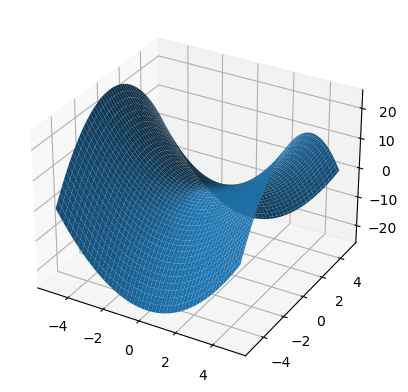

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = torch.linspace(-5, 5, steps=100)
ys = torch.linspace(-5, 5, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = f(x, y)
ax = plt.axes(projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())

In [14]:
def fp(x, y):
  return torch.FloatTensor([2*x, -2*y])

In [15]:
x = (3, 0)
print(f(*x))
print(fp(*x))

9
tensor([6., 0.])


In [16]:
def fpp(x, y):
  return torch.FloatTensor([
    [2, 0],
    [0, -2]
  ])
fpp(0, 0)

tensor([[ 2.,  0.],
        [ 0., -2.]])

In [17]:
L, V = torch.linalg.eig(fpp(0,0))
print(L)
print(V)

tensor([ 2.+0.j, -2.+0.j])
tensor([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]])


- for the case of bad condition number

In [35]:
def f(x, y):
  return (x - y)**2 + 5*(x + y)**2

def fp(x, y):
  return torch.FloatTensor([12*x + 8*y, 8*x + 12*y])

def fpp(x, y):
  return torch.FloatTensor([
    [12, 8],
    [8, 12]
  ])

In [36]:
L, V = torch.linalg.eig(fpp(0,0))
print(L)
print(V)

tensor([20.0000+0.j,  4.0000+0.j])
tensor([[ 0.7071+0.j, -0.7071+0.j],
        [ 0.7071+0.j,  0.7071+0.j]])


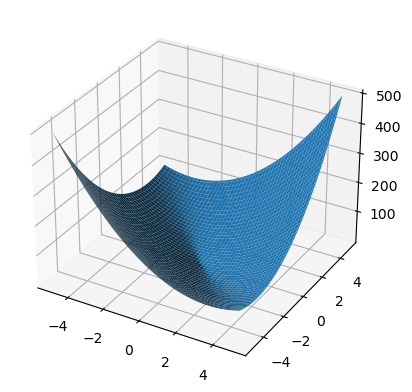

In [37]:
xs = torch.linspace(-5, 5, steps=100)
ys = torch.linspace(-5, 5, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = f(x, y)
ax = plt.axes(projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())

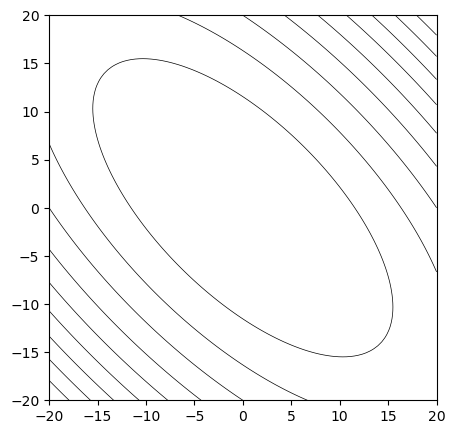

In [42]:
xs = torch.linspace(-20, 20, steps=100)
ys = torch.linspace(-20, 20, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = f(x, y)

plt.figure(figsize=(5, 5))
plt.contour(x, y, z, levels=10, linewidths=0.5, colors='k')

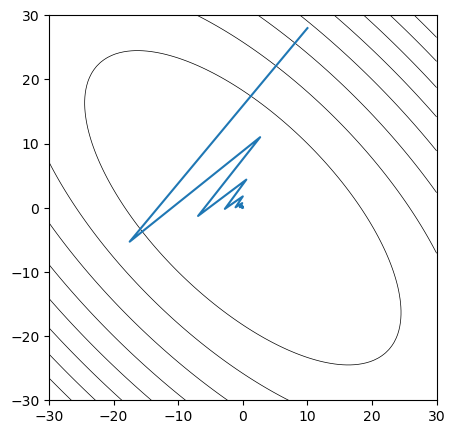

In [56]:
trace = torch.zeros((30, 2))
start = torch.FloatTensor([10, 28])
epsilon = 0.08
for idx in range(30):
  trace[idx] = start
  start = start - fp(*start) * epsilon

xs = torch.linspace(-30, 30, steps=100)
ys = torch.linspace(-30, 30, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = f(x, y)

plt.figure(figsize=(5, 5))
plt.contour(x, y, z, levels=10, linewidths=0.5, colors='k')
plt.plot(trace[:, 0], trace[:, 1])

- Lipschitz continuous
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/58/Lipschitz_Visualisierung.gif" width="200"/>
</div>

- constrained optimization
  - for the case of $ \|x\|_2 \leq 1 $ 

In [66]:
def f(x, y):
  return (x - 3)**2 + (y - 1)**2

def fp(x, y):
  return torch.FloatTensor([2*x - 6, 2*y - 2])

def fpp(x, y):
  return torch.FloatTensor([
    [2, 0],
    [0, 2]
  ])

In [67]:
def g(th):
  return f(torch.cos(th), torch.sin(th))

In [70]:
x = torch.FloatTensor([2.])
cost = g(x)
cost.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [113]:
trace = torch.zeros((30, 2))
th = torch.tensor([0.0], requires_grad=True)
for idx in range(30):
  aco = torch.cos(th)
  asi = torch.sin(th)
  trace[idx, 0] = aco
  trace[idx, 1] = asi
  c = (aco - 3)**2 + (asi - 1)**2
  if aco.grad is not None:
    aco.grad.zero_()

  if asi.grad is not None:
    asi.grad.zero_()


  if th.grad is not None:
    th.grad.zero_()

  th.retain_grad()
  c.backward()

  th = th - 0.4*th.grad

[1. 0.]
[0.08958409 0.99597925]


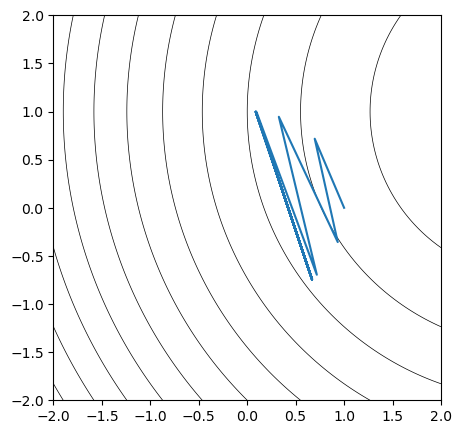

In [114]:

trace = trace.detach().numpy()

xs = torch.linspace(-2, 2, steps=100)
ys = torch.linspace(-2, 2, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = f(x, y)

plt.figure(figsize=(5, 5))
plt.contour(x, y, z, levels=10, linewidths=0.5, colors='k')
plt.plot(trace[:, 0], trace[:, 1])

print(trace[0])
print(trace[-1])


tensor([ 2., 10.])